# Visualisation of Feature Selection on simulation data from sklearn's make_classification

## Overview
This notebook displays the percentage of informative features captured and noise output by each of the six feature selection methods tested (LLpowershap, Powershap, Borutashap, Shapicant, Chi² and F test)..

Adapted from the notebook available at https://github.com/predict-idlab/powershap by the authors of Powershap python package

Orignal Notebook: https://github.com/predict-idlab/powershap/blob/main/examples/visualisation_powershap.ipynb



## Dataset Information
- Simulated datasets of sample size 5000 and 10000


## Notes
- Hypercube se to True



In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

import seaborn as sns
from matplotlib.ticker import ScalarFormatter

def append_list_strings_dict(list_1,list_2):
    return_list = []
    for i in range(len(list_1)):
        return_list.append(list_1[i]+" ("+str(list_2[i])+")")
    return return_list

## For sample size 5000

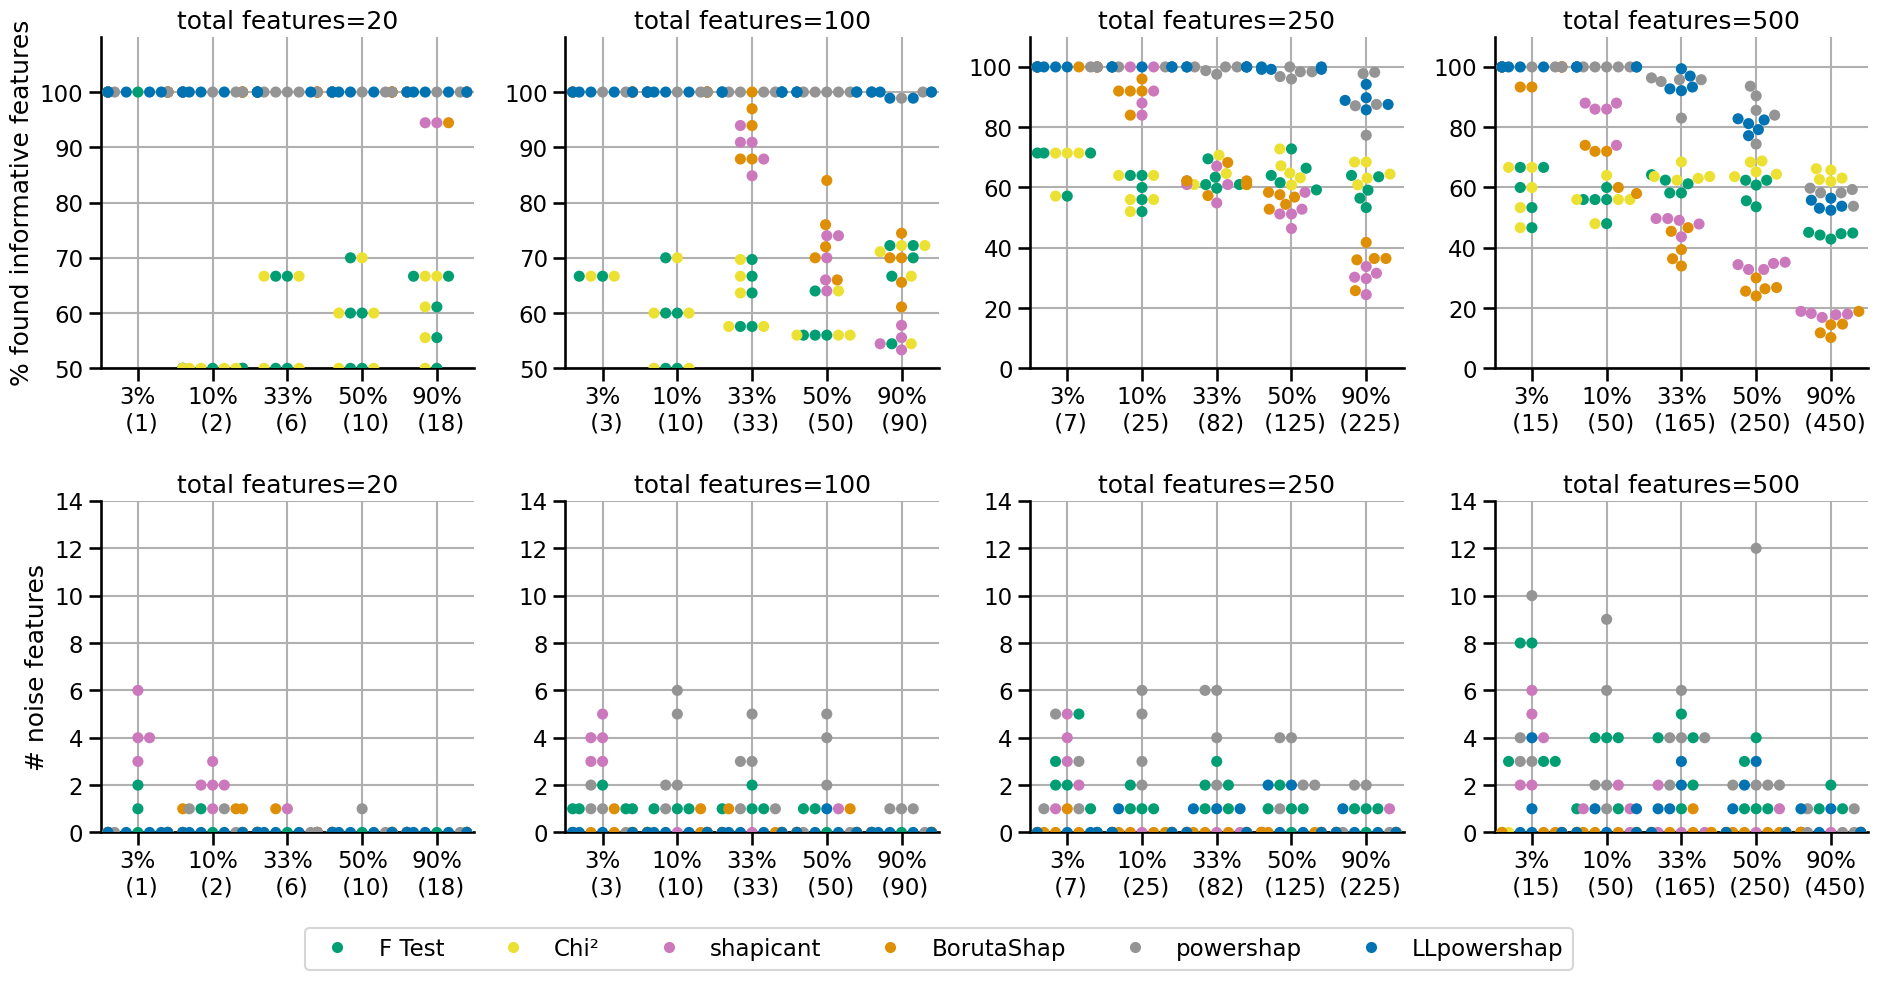

In [37]:
import warnings
warnings.filterwarnings('ignore')


sub = 'xgb_250_git'
files_loc = f'../results/{sub}'
methods = {'llpowershap': 'LLpowershap', 'powershap':'powershap', 'borutashap': 'BorutaShap', 'shapicant':'shapicant', 'chi_squared': 'Chi²', 'f_test':'F Test'}

from collections import OrderedDict
methods = OrderedDict(reversed(list(methods.items())))

df_all = None
hypercube =  '_hypercube' # '' 
for method in methods:
    df = pd.read_csv(f'{files_loc}/make_classi_{method}_output_df{hypercube}.csv')
    df['method'] = methods[method]
    if df_all is None:
        df_all = df
    else:
        df_all = pd.concat([df_all, df])

df_n = len(methods)

order_samples = [5000]
order_features = [20,100,250,500]

df_all = df_all[df_all.n_samples.isin(order_samples)]
df_all = df_all[df_all["total_features"].isin(order_features)]

# 4 %informative x 5 seeds x 4 n_features x 6 methods
df_all["%informative_features"]=np.tile(np.repeat([3,10,33,50,90],5), len(order_features) * len(methods))
df_all["%found_informative_features"]=df_all["found_informative_features"]/df_all["informative_features"]*100
df_all["%outputted_noise_features"]=df_all["outputted_noise_features"]/(df_all["total_features"]-df_all["informative_features"])*100

df_all = df_all.rename(columns={"total_features":"total features"})

df_all = df_all[df_all.n_samples.isin(order_samples)]
df_all = df_all[df_all["total features"].isin(order_features)]
df_all = df_all.drop(columns="n_samples")


colours = sns.color_palette("colorblind", n_colors=20)

custom_colors = {'BorutaShap': colours[1], 'powershap':colours[7],  
                 'Chi²': colours[8], 'F Test':colours[2],  
                 'shapicant':colours[4], 'LLpowershap': colours[0]}


sns.set_context("talk")

row_order = ["%found_informative_features", "outputted_noise_features"]
row_names = ["% found informative features", "# noise features"]

data = df_all.melt(
        id_vars=["total features","informative_features","method", "%informative_features"])

g = sns.catplot(
    data=data,
    kind="swarm",
    hue="method",
    x="%informative_features",
    errorbar='sd',
    y="value",
    col="total features",
    row="variable",
    row_order=row_order,
    sharey=False,
    sharex=False,
    legend_out=True,
    palette=custom_colors,
    height=5,
    size=8
)

g._legend.remove()
g.set_titles("{col_var}={col_name}")

g.fig.subplots_adjust(hspace=0.4)  

g.fig.subplots_adjust(bottom=0.15, right=0.85)
g.fig.legend(loc='lower center', ncol=6)


axis_all = g.axes

axis_all[0][0].set_ylim([50,110])
axis_all[0][0].set_yticks(ticks=[50,60,70,80,90,100])

axis_all[0][1].set_ylim([50,110])
axis_all[0][1].set_yticks(ticks=[50,60,70,80,90, 100])

axis_all[0][2].set_ylim([0,110])
axis_all[0][2].set_yticks(ticks=[0,20,40, 60, 80, 100])

axis_all[0][3].set_ylim([0,110])
axis_all[0][3].set_yticks(ticks=[0,20,40, 60, 80, 100])

axis_all[1][0].set_ylim([0,14])
axis_all[1][1].set_ylim([0,14])
axis_all[1][2].set_ylim([0,14])
axis_all[1][3].set_ylim([0,14])

j_plot=0
for row_axs, row_name in zip(g.axes, row_names):
    row_axs[0].set_ylabel(row_name)
    
    for rows in row_axs:
        rows.grid()
        rows.set_xlabel("")
        rows.set_xticks(ticks=['3','10','33','50','90'])
        rows.set_xticklabels(append_list_strings_dict(["3%\n","10%\n","33%\n","50%\n","90%\n"], df_all[(df_all["total features"]==order_features[j_plot%5])&(df_all.seed==j_plot%5)].informative_features.values)) 
        j_plot = j_plot + 1
    j_plot = 0

plt.savefig(f'{files_loc}/make_classi_performance_n_{order_samples[0]}_{hypercube}.jpg', bbox_inches='tight', dpi=600)
plt.savefig(f'{files_loc}/make_classi_performance_n_{order_samples[0]}_{hypercube}.pdf', bbox_inches='tight', dpi=600)
plt.savefig(f'{files_loc}/make_classi_performance_n_{order_samples[0]}_{hypercube}.svg', bbox_inches='tight', dpi=600)
plt.savefig(f'{files_loc}/make_classi_performance_n_{order_samples[0]}_{hypercube}.png', bbox_inches='tight', dpi=600)
            


## For sample size 10000

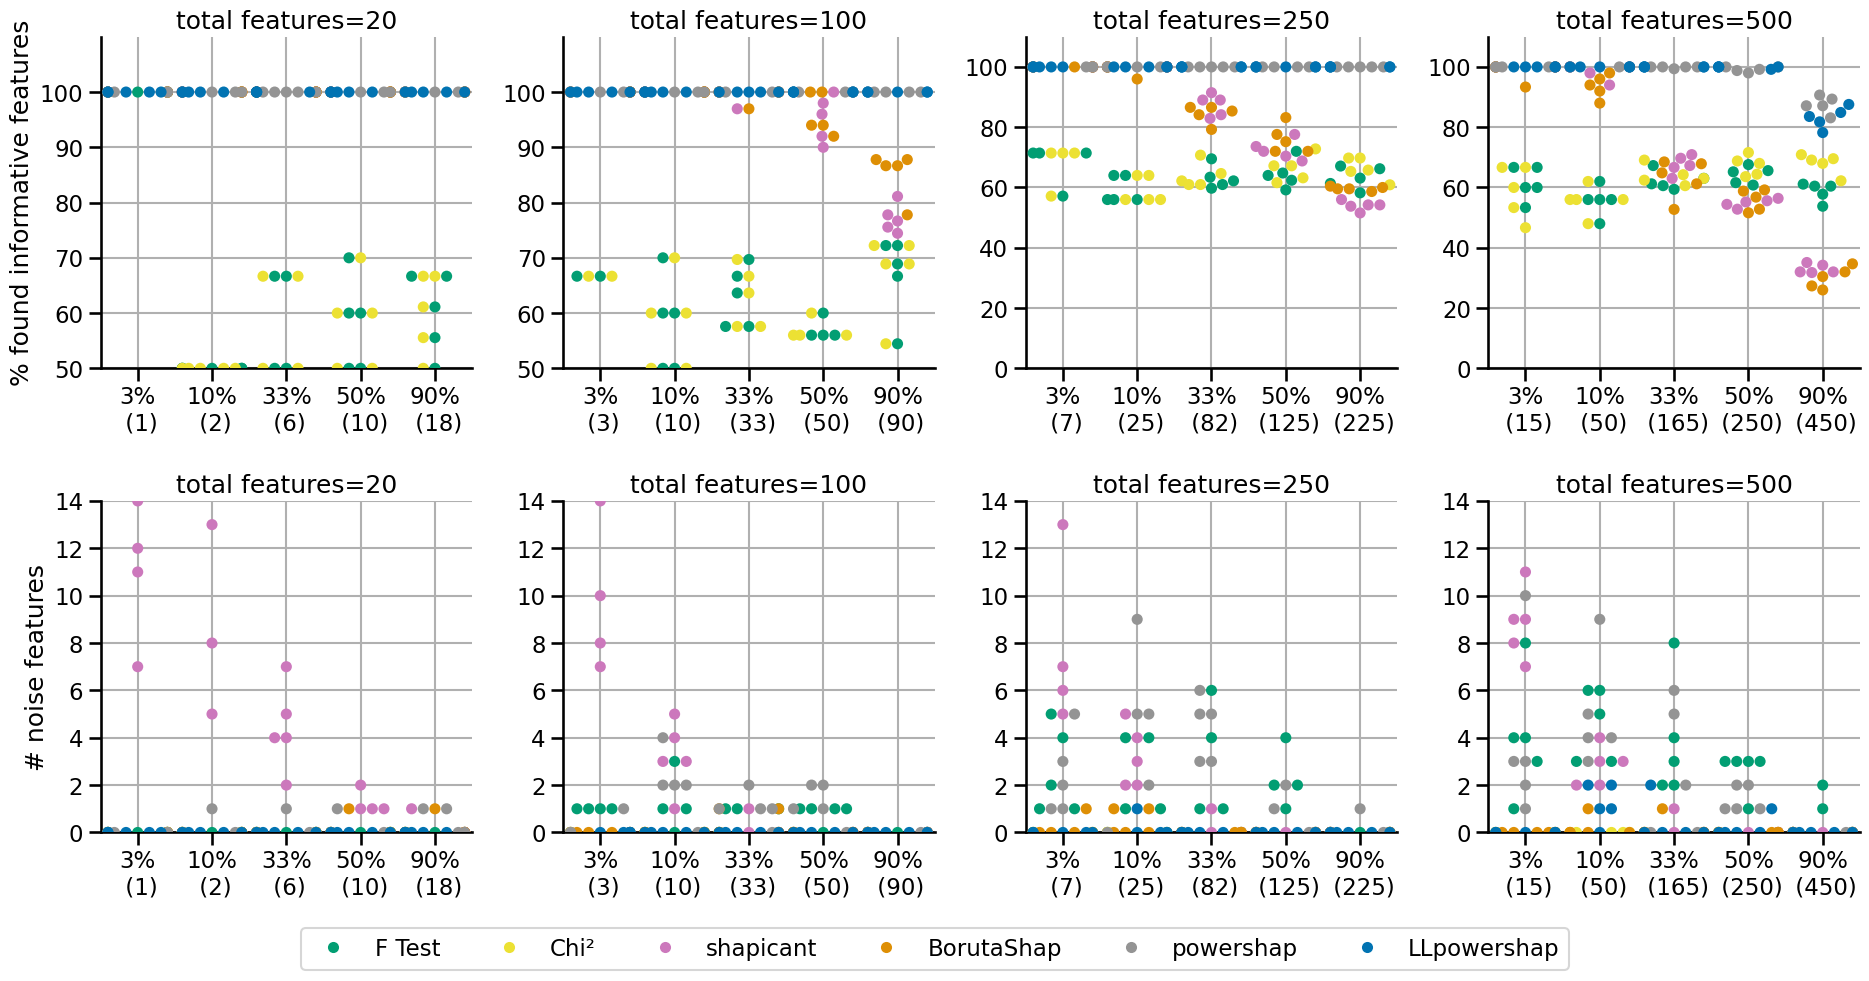

In [29]:
import warnings
warnings.filterwarnings('ignore')

sub = 'xgb_250_git'
files_loc = f'../results/{sub}'
methods = {'llpowershap': 'LLpowershap', 'powershap':'powershap', 'borutashap': 'BorutaShap', 'shapicant':'shapicant', 'chi_squared': 'Chi²', 'f_test':'F Test'}

from collections import OrderedDict
methods = OrderedDict(reversed(list(methods.items())))


df_all = None
hypercube =  '_hypercube' # '' 
for method in methods:
    df = pd.read_csv(f'{files_loc}/make_classi_{method}_output_df{hypercube}.csv')
    df['method'] = methods[method]
    if df_all is None:
        df_all = df
    else:
        df_all = pd.concat([df_all, df])

df_n = len(methods)

order_samples = [10000]
order_features = [20,100,250,500]

df_all = df_all[df_all.n_samples.isin(order_samples)]
df_all = df_all[df_all["total_features"].isin(order_features)]

# 4 %informative x 5 seeds x 4 n_features x 6 methods
df_all["%informative_features"]=np.tile(np.repeat([3,10,33,50,90],5), len(order_features) * len(methods))
df_all["%found_informative_features"]=df_all["found_informative_features"]/df_all["informative_features"]*100
df_all["%outputted_noise_features"]=df_all["outputted_noise_features"]/(df_all["total_features"]-df_all["informative_features"])*100

df_all = df_all.rename(columns={"total_features":"total features"})

df_all = df_all[df_all.n_samples.isin(order_samples)]
df_all = df_all[df_all["total features"].isin(order_features)]
df_all = df_all.drop(columns="n_samples")


colours = sns.color_palette("colorblind", n_colors=20)

custom_colors = {'BorutaShap': colours[1], 'powershap':colours[7],  
                 'Chi²': colours[8], 'F Test':colours[2],  
                 'shapicant':colours[4], 'LLpowershap': colours[0]}


sns.set_context("talk")

row_order = ["%found_informative_features", "outputted_noise_features"]
row_names = ["% found informative features", "# noise features"]

data = df_all.melt(
        id_vars=["total features","informative_features","method", "%informative_features"])

g = sns.catplot(
    data=data,
    kind="swarm",
    hue="method",
    x="%informative_features",
    errorbar='sd',
    y="value",
    col="total features",
    row="variable",
    row_order=row_order,
    sharey=False,
    sharex=False,
    legend_out=True,
    palette=custom_colors,
    height=5,
    size=8
)

g._legend.remove()
g.set_titles("{col_var}={col_name}")

g.fig.subplots_adjust(hspace=0.4)  

g.fig.subplots_adjust(bottom=0.15, right=0.85)
g.fig.legend(loc='lower center', ncol=6)

axis_all = g.axes

axis_all[0][0].set_ylim([50,110])
axis_all[0][0].set_yticks(ticks=[50,60,70,80,90,100])

axis_all[0][1].set_ylim([50,110])
axis_all[0][1].set_yticks(ticks=[50,60,70,80,90, 100])

axis_all[0][2].set_ylim([0,110])
axis_all[0][2].set_yticks(ticks=[0,20,40, 60, 80, 100])

axis_all[0][3].set_ylim([0,110])
axis_all[0][3].set_yticks(ticks=[0,20,40, 60, 80, 100])

axis_all[1][0].set_ylim([0,14])
axis_all[1][1].set_ylim([0,14])
axis_all[1][2].set_ylim([0,14])
axis_all[1][3].set_ylim([0,14])

#axis_all[0][0].set_xticks(ticks=['10','33','50','90'])
#axis_all[0][0].set_xticklabels(append_list_strings_dict(["10%\n","33%\n","50%\n","90%\n"],df_all[(df_all["total features"]==order_features[j_plot%5])&(df_all.seed==j_plot%5)].informative_features.values)) 

j_plot=0
for row_axs, row_name in zip(g.axes, row_names):
    row_axs[0].set_ylabel(row_name)
    
    for rows in row_axs:
        rows.grid()
        rows.set_xlabel("")
        rows.set_xticks(ticks=['3','10','33','50','90'])
        rows.set_xticklabels(append_list_strings_dict(["3%\n","10%\n","33%\n","50%\n","90%\n"], df_all[(df_all["total features"]==order_features[j_plot%5])&(df_all.seed==j_plot%5)].informative_features.values)) 
        j_plot = j_plot + 1
    j_plot = 0

plt.savefig(f'{files_loc}/make_classi_performance_n_{order_samples[0]}_{hypercube}.jpg', bbox_inches='tight')
plt.savefig(f'{files_loc}/make_classi_performance_n_{order_samples[0]}_{hypercube}.pdf', bbox_inches='tight')
plt.savefig(f'{files_loc}/make_classi_performance_n_{order_samples[0]}_{hypercube}.svg', bbox_inches='tight')
plt.savefig(f'{files_loc}/make_classi_performance_n_{order_samples[0]}_{hypercube}.png', bbox_inches='tight')
            
